# Exploratory Data Analysis (MS Big Data and IA) 

For any questions on the course or this notebook: charlotte.laclau@telecom-paris.fr

The purpose of this practical is to make you go through the different eda techniques presented during the course. 
We will work with this lab for several sessions. 

The dataset that we will consider consists of food recipes and recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). It is often used to evaluate machine learning models that perform recipe recommendations. We will mainly study two files : recipe.csv and inter.csv. 

## Organisation of the sessions 


This lab is splitted into several parts. The begining is well guided and has your skills improve, you'll have to be more independent. Mandatory questions are in <span style="color:blue">blue</span> in the subsequent notebook. 
At the end of each part you have a small bonus section. I strongly encourage you to do them (not only for the grade but mostly to improve your python coding skills). 


## Evaluation 

At the end of the course, this lab with be graded. Here are some guidelines about what I expect from you. 
- At the end of our last course, you will upload your notebook along with a `requirement.txt` file on ecampus 
- Your code needs to be carefully commented 
- You have to write a few sentence commenting all the results that you obtained ! I suggest to group results and write intermediate conclusions answering the different questions. 
- I don't want to see any personalized functions or classes in the main notebook. Think modular code! If you want to write specific functions write them in some `utils.py` file. The main notebook code should be as light as possible. 

## Part 1 - Univariate Analysis

In [1]:
import ast
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from eda_function import * 

Let us start with the recipe file that contains the reciped submitted to the website describes by several features. 
Below you'll find some code to read the data and print the first three rows. I used the `panda` library for these two steps, meaning that I will be manipulating a dataframe object. 

In [2]:
# Import the data and print the first three rows 
recipe = pd.read_csv("recipe/RAW_recipes.csv")
recipe.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


**Questions** 
- <span style="color:blue">How many recipes are in the file ? </span>
- <span style="color:blue">How many variables do you have. Write the list in a md cell along with the type of the variable for each.</span>
- <span style="color:blue">Are there any missing values in your dataset?</span>

In [3]:
# Your code

print("The number of recipes are", recipe.shape[0])
print("The number of variable are", recipe.shape[1])

print("The number of missing values are \n", recipe.isnull().sum())

The number of recipes are 231637
The number of variable are 12
The number of missing values are 
 name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64


List of variables:

- name: qualitatif nominal
- id: qualitatif nominal
- minutes: quantitatif discrete
- contributor_id: qualitatif nominal
- submitted: quantitatif continuous
- tags: qualitatif nominal
- nutrition: quantitatif continuous
- n_steps: quantitatif discrete
- steps: qualitatif nominal
- description: qualitatif nominal
- ingredients: qualitatif nominal
- n_ingredients: quantitatif discrete

Comments:

In the dataset, we have 231637 recipes and 12 informations are given for each recipe. There is a total of 4980 missings values (1 name and 4979 description)

In [4]:
recipe.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [5]:
# change the type of the variable 'id' to odject
recipe['id'] = recipe['id'].astype('object')
recipe['contributor_id'] = recipe['contributor_id'].astype('object')

In [6]:
# change the type of the variable nutrition and ingredient to list
recipe['nutrition'] = recipe['nutrition'].apply(ast.literal_eval)
recipe['ingredients'] = recipe['ingredients'].apply(ast.literal_eval)

In [7]:
recipe.dtypes

name              object
id                object
minutes            int64
contributor_id    object
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

### A example of univariate analysis with *minutes*

Let's start by analysing the feature **minutes**. It corresponds to the number of minutes required to make a given recipe. Here a few questions to answer to 
- What is the average time required to make a recipe on the website ? 
- What are the fastest and the longest recipe, and how long do they take ? 

For both questions we will use some statistics including the mean, the minimum and the maximum. 

In [8]:
# Average time 
avg_time = recipe['minutes'].mean()
print("Average time for recipes: ", avg_time)

Average time for recipes:  9398.546009488984


Odd ? What do you think ? 
Let's convert the maximum into hours and minutes to make it easier to understand. 

In [9]:
# Get hours with floor division 
hours = avg_time // 60

# Get minutes with modulus
minutes = avg_time % 60

print("Average time is {} hours and {} minutes!".format(round(hours),round(minutes)))

Average time is 156 hours and 39 minutes!


Seems a lot ! I prefer to order in that case. Let's see what can cause this very high number by trying to answer the second question.

In [10]:
print('Maximum cooking time', recipe['minutes'].max())
print('Minimum cooking time', recipe['minutes'].min())

Maximum cooking time 2147483647
Minimum cooking time 0


So the longest cooking recipe roughly takes around 4085 years to be made ... while the minumum is 0. Seems like we have some outliers. 

Questions
- <span style="color:blue"> Print the row(s) of the dataframe corresponding to the maximum value for minutes </span>
- <span style="color:blue"> Print the number of row(s) of the dataframe corresponding to the minimum value for minutes </span>
- <span style="color:blue"> Choose an appropriate visualisation to highlight these outliers</span>

In [11]:
# Your code

recipe.loc[recipe["minutes"] == recipe["minutes"].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"[rolled oats, unsweetened dried shredded cocon...",8


In [12]:
# Your code

nb_min = len(recipe.loc[recipe["minutes"] == recipe["minutes"].min()])
print("The number of recipe with the minimum minutes are", nb_min)

The number of recipe with the minimum minutes are 1094


<Axes: ylabel='minutes'>

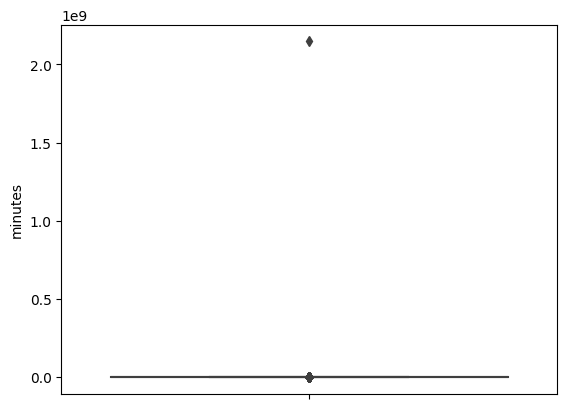

In [13]:
# Your code
sns.boxplot(data=recipe, y="minutes")

### Matplotlib

#### Online Documentation

The [matplotlib.org](https://matplotlib.org/) project website is the primary online resource for the library's documentation. It contains the example galleries, FAQs, API documentation, and tutorials.
You can take a look at the [Gallery](https://matplotlib.org/stable/gallery/index.html) to see the variety of ways one can make figures.

#### Basics of Matplotlib

Let's start by taking a closer look at the anatomy of a Matplolib plot by answering to the following questions. 

1. **What exactly is a Figure?** 

The top level container for all the plot elements. It is the overall window or page that everything is drawn on. The Figure object is instantiated by calling the `figure()` function from the pyplot module. You can create multiple independent Figures. A Figure can have several other things in it, such as a title, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.

2. **What are the Axes?** 

To the figure you add Axes. Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D visualisation) Axis objects (x and y). Axes can have ticks, labels, etc. associated with it.


**Note** We have previously imported the `pyplot` module of the `matplotlib` library under the alias `plt`.
Pyplot provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot. For example, calling `plot` from `pyplot` will automatically create the necessary figure and axes to achieve the desired plot.

<img src="img/anatomy_01.png" alt="anatomy of a figure" />

Now that we have identified an abnormal values, what can we do with it? 

*Easy answer*: remove it ! (let's do this for now)

*Fancy answer*: consider this as a missing data input and impute it (keep that for later).

**Question**
- <span style="color:blue">Remove the recipe containing these abnormal values and check the new size of the data</span>
- <span style="color:blue">Plot the variable minutes with a boxplot -- this time you can try seaborn!</span>
- <span style="color:blue">Check the new maximum and minimum</span>
- <span style="color:blue">Print the 5 first observations for which abnormal values are observed. Comment</span>
- <span style="color:blue">Propose a strategy to deal with these observations.</span>
- <span style="color:blue">In total how many observations have you removed?</span>

In [14]:
# Your code

recipe_clear = recipe.loc[(recipe['minutes'] != recipe["minutes"].min()) & (recipe['minutes'] != recipe["minutes"].max())]
print('The new number of recipe is', recipe_clear.shape[0])

The new number of recipe is 230542


<Axes: ylabel='minutes'>

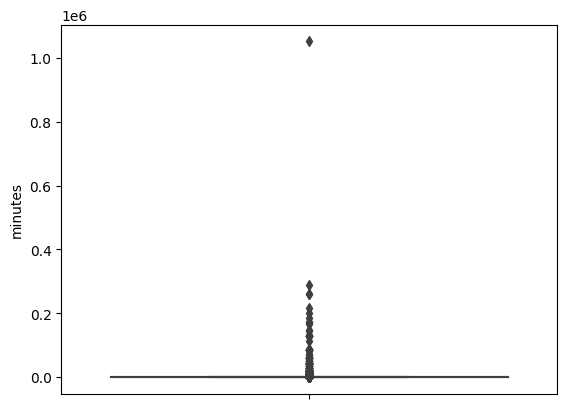

In [15]:
# Your code
sns.boxplot(data=recipe_clear, y='minutes')

In [16]:
# Your code
print('New maximum cooking time', recipe_clear['minutes'].max())
print('New minimum cooking time', recipe_clear['minutes'].min())

New maximum cooking time 1051200
New minimum cooking time 1


In [17]:
# Your code

recipe_clear.sort_values(by='minutes', ascending=False).head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","[cream, peach]",2
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"[berries, vodka, granulated sugar]",3
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","[gingerroot, lemons, juice and rind of, whole ...",7
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"[vanilla beans, vodka]",2
155044,peach brandy,98912,216015,34146,2004-09-01,"['time-to-make', 'course', 'main-ingredient', ...","[3645.3, 3.0, 2040.0, 0.0, 16.0, 0.0, 173.0]",9,"['use only fully ripened , unblemished fruit',...",posted in reply to a message board request for,"[fresh peaches, granulated sugar, honey, vodka]",4


Comments: 

When we observe the time on preparation of this recipe, we can notice that the preparation takes many months to be realize and it's because we have food that need to be conserve many days like wine.

In order, to have recipe that people can mostly realize, we will make sure to use only recipe that can be done in less than 1 day (1440 minutes). We have more chance to see somebody make a cake than make wine

In [18]:
# Your code

recipe_clear_2 = recipe.loc[(recipe['minutes'] > 0) & (recipe['minutes'] < 1440)]
print('The new number of recipe is', recipe_clear_2.shape[0])

The new number of recipe is 228422


<Axes: ylabel='minutes'>

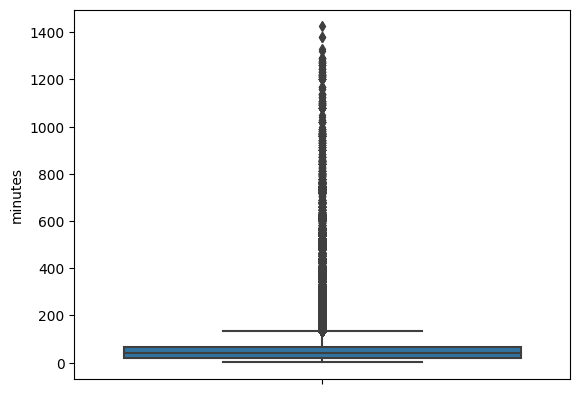

In [19]:
sns.boxplot(data=recipe_clear_2, y='minutes')

[None]

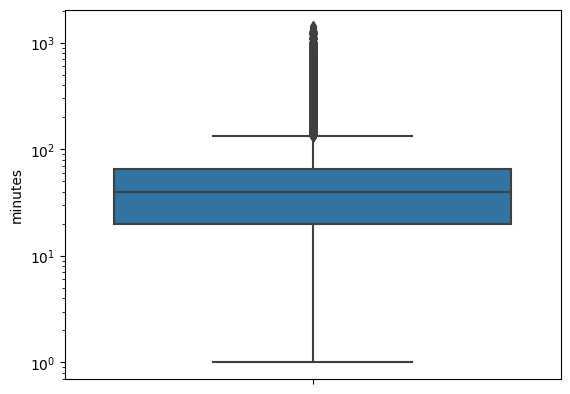

In [20]:
sns.boxplot(data=recipe_clear_2, y='minutes').set(yscale='log')

So in this particular case, boxplot suffers from the very high standard deviation observed for the feature minutes. 
Can we come up with a better visualisation ? 

- **Option 1**: use a log-scale on the y axis the feature
- **Option 2**: remove a lot of values

**Questions**: 
- <span style="color:blue"> Print the values of the different quartile (Q1, median and Q3). What can you conclude for this variable ? </span>
- <span style="color:blue"> Compare the mean with the median. What do you observe?</span>
- <span style="color:blue">Create a subplot with on the left the original boxplot, and on the right the same boxplot but with a log scale on the y-axis.</span> 

#### Subplots

The matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns, it returns a tuple `(fig, ax`), giving a single figure `fig` with an array of axe `ax`.

There is at least three different ways to create a subplot and to add plots to each created ax (dig in the documentation). 
More details on the different arguments of the `subplots` method [here](https://www.educative.io/edpresso/what-is-a-subplots-in-matplotlib).

In [21]:
# Your code
q1 = recipe_clear_2['minutes'].quantile(0.25)
med = recipe_clear_2['minutes'].quantile(0.5)
q3 = recipe_clear_2['minutes'].quantile(0.75)

# print('1st quartile =', recipe_clear_2['minutes'].quantile(0.25))
# print('Median =', recipe_clear_2['minutes'].quantile(0.5))
# print('3rd quartile =', recipe_clear_2['minutes'].quantile(0.75))

print('25% of recipe take less than', q1, 'minutes')
print('50% of recipe take less than', med, 'minutes')
print('75% of recipe take less than', q3, 'minutes')

25% of recipe take less than 20.0 minutes
50% of recipe take less than 40.0 minutes
75% of recipe take less than 65.0 minutes


In [22]:
# Your code

moy = recipe_clear_2['minutes'].mean()
print("The mean time of cooking is", moy)
if(moy < med):
    print("The mean is less than the mediane")
else:
    print("The mean is more than the mediane")

The mean time of cooking is 64.3125881044733
The mean is more than the mediane


[None]

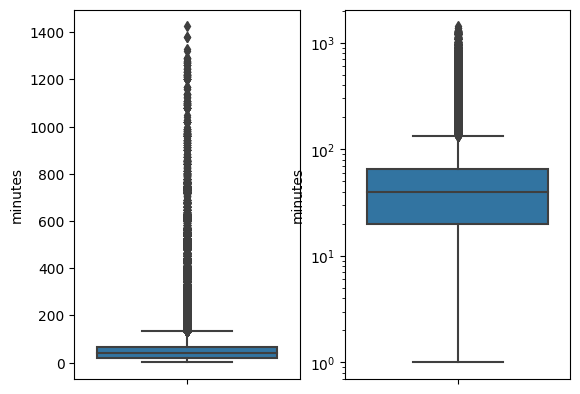

In [23]:
plt.subplot(1, 2, 1)
sns.boxplot(data=recipe_clear_2, y='minutes')

plt.subplot(1, 2, 2)
sns.boxplot(data=recipe_clear_2, y='minutes').set(yscale='log')

#### Summing-up: 

Comments.

For now let's keep it this way. We will go back to this matter in the feature engineering session.

Now we can complete this analysis with distribution metrics, namely the skewness and the kurtosis coefficient. 

### Univariate Analysis follow-up 

You are now ready to propose your own analysis for the other variables. 
Consider the following variables: **contributor_id, tags, n_steps, n_ingredients and ingredients**. 
The first step is to formulate questions that you would like to answer to using these variables. 

For example, if we take the contributor_id, please answer the following questions using the varying tools seen during the class. 

**Questions**
- <span style="color:blue">How many unique contributors are there?</span> 
- <span style="color:blue">Who is the contributor that posted the most recipes ? And how many recipes did that person posted ? </span>
- <span style="color:blue">What is the average number of recipes posted by users on the website ? </span>

Start with these three questions, then think about questions for the remaining variables mentioned above. 

In [24]:
recipe_clear_2.dtypes

name              object
id                object
minutes            int64
contributor_id    object
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

#### Contributor_id Analysis

In [25]:
recipe_clear_2['contributor_id'] = recipe_clear_2["contributor_id"].astype("category")
recipe_clear_2.dtypes

C:\Users\rtcho\AppData\Local\Temp\ipykernel_6332\3523922573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_clear_2['contributor_id'] = recipe_clear_2["contributor_id"].astype("category")


name                object
id                  object
minutes              int64
contributor_id    category
submitted           object
tags                object
nutrition           object
n_steps              int64
steps               object
description         object
ingredients         object
n_ingredients        int64
dtype: object

In [26]:
# Unique contributors

print("The number of contributor:", len(recipe_clear_2['contributor_id'].unique()))
contributor_group = recipe_clear_2.groupby(by='contributor_id')['contributor_id'].agg(['count'])
print("The contributor with the most contribution:", contributor_group.loc[contributor_group['count'] == contributor_group['count'].max()].index[0], "with", contributor_group['count'].max(), "recipes posted")
print("The average of recipes posted is", round(contributor_group['count'].mean()), "per contributor")

The number of contributor: 27753
The contributor with the most contribution: 89831 with 2998 recipes posted
The average of recipes posted is 8 per contributor


In [27]:
contributor_group.index

CategoricalIndex([        27,       1530,       1531,       1533,       1534,
                        1535,       1536,       1538,       1539,       1540,
                  ...
                  2002230309, 2002230649, 2002232695, 2002234079, 2002234259,
                  2002234364, 2002234769, 2002247884, 2002285039, 2002289981],
                 categories=[27, 1530, 1531, 1533, ..., 2002234769, 2002247884, 2002285039, 2002289981], ordered=False, dtype='category', name='contributor_id', length=27753)

*Graphic*

[None]

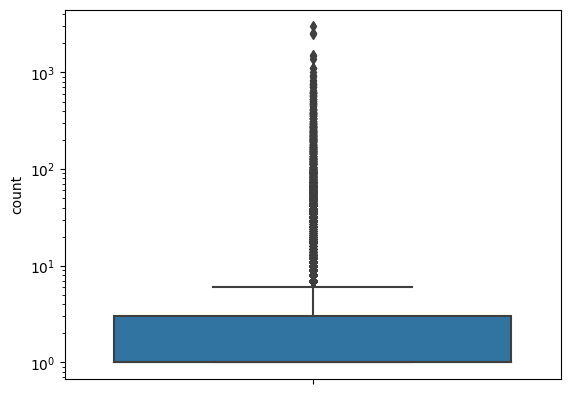

In [28]:
sns.boxplot(data=contributor_group, y='count').set(yscale='log')

<Axes: ylabel='count'>

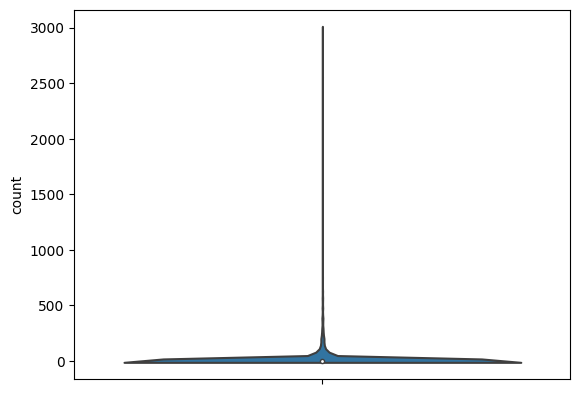

In [29]:
sns.violinplot(data=contributor_group, y='count')

*Comment*


#### Tags Analysis

**Questions :**
- <span style="color:blue"> What is the average of tags use ? (number of tags per recipes)</span>
- <span style="color:blue"> Which are the most tags used ?</span>

In [30]:
recipes_tags = recipe_clear_2["tags"]
recipes_tags.head()

0    ['60-minutes-or-less', 'time-to-make', 'course...
1    ['30-minutes-or-less', 'time-to-make', 'course...
2    ['time-to-make', 'course', 'preparation', 'mai...
3    ['60-minutes-or-less', 'time-to-make', 'course...
4    ['weeknight', 'time-to-make', 'course', 'main-...
Name: tags, dtype: object

In [31]:
# Length of each tags
import ast
tags_recipe = recipe_clear_2.copy()
tags_recipe['tags_length'] = tags_recipe['tags'].apply(lambda x : len(ast.literal_eval(x)))
tags_recipe.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags_length
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,20
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,20
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,9
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,30
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,21


In [32]:
print("The maximum number of tags is", tags_recipe['tags_length'].max())
print("The minimum number of tags is", tags_recipe['tags_length'].min())
print("The average number of tags is", round(tags_recipe['tags_length'].mean()))

The maximum number of tags is 73
The minimum number of tags is 1
The average number of tags is 18


In [33]:
print("The recipe with the maximum number of tags is", tags_recipe.loc[tags_recipe['tags_length'] == tags_recipe['tags_length'].max()]['name'].values[0])
tags_recipe.loc[tags_recipe['tags_length'] == tags_recipe['tags_length'].max()]

The recipe with the maximum number of tags is cheese ball 2


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,tags_length
39328,cheese ball 2,77620,25,77624,2003-12-01,"['30-minutes-or-less', 'time-to-make', 'course...","[110.6, 16.0, 4.0, 3.0, 4.0, 33.0, 0.0]",3,"['mix all ingredients very well', 'chill mixtu...",this is another family recipe along with chees...,"[cream cheese, crushed pineapple, green pepper...",6,73


In [34]:
print("The number of recipe with the minimum number of tags is", len(tags_recipe.loc[tags_recipe['tags_length'] == tags_recipe['tags_length'].min()]))

The number of recipe with the minimum number of tags is 110


<Axes: ylabel='tags_length'>

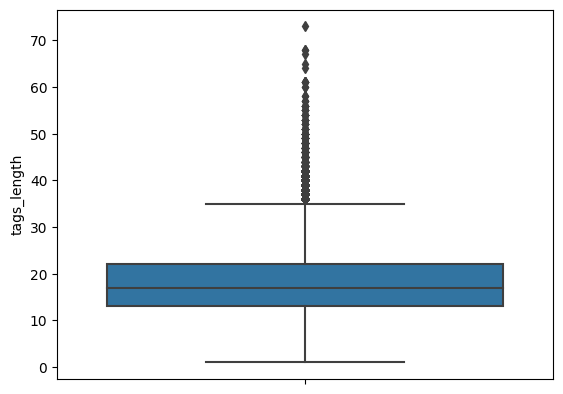

In [35]:
sns.boxplot(data=tags_recipe, y='tags_length')

In [36]:
tags = []
for i in recipes_tags:
    tags.extend(i.replace("[", "").replace("]", "").split(","))
print("The number of tags:", len(tags))

print("The number of unique tags:", len(set(tags)))

The number of tags: 4084887
The number of unique tags: 572


In [37]:
# Display the 15 most used tags
tag_count = {}
for tag in tags:
    if tag in tag_count:
        tag_count[tag] += 1
    else:
        tag_count[tag] = 1
        
tag_count = pd.DataFrame.from_dict(tag_count, orient='index', columns=['count'])
tag_count = tag_count.reset_index().rename(columns={'index':'tag'})
tag_count['percentage'] = round(tag_count['count'] / len(recipe_clear_2) * 100, 2)
print("The 15 most used tags are:")
tag_count.sort_values(by='count', ascending=False).head(20)

The 15 most used tags are:


,tag,count,percentage
5,'preparation',227233,99.48
2,'course',210187,92.02
1,'time-to-make',183038,80.13
3,'main-ingredient',167826,73.47
16,'dietary',162519,71.15
11,'easy',124731,54.61
6,'occasion',112305,49.17
4,'cuisine',89739,39.29
92,'low-in-something',84522,37.00
22,'main-dish',71015,31.09


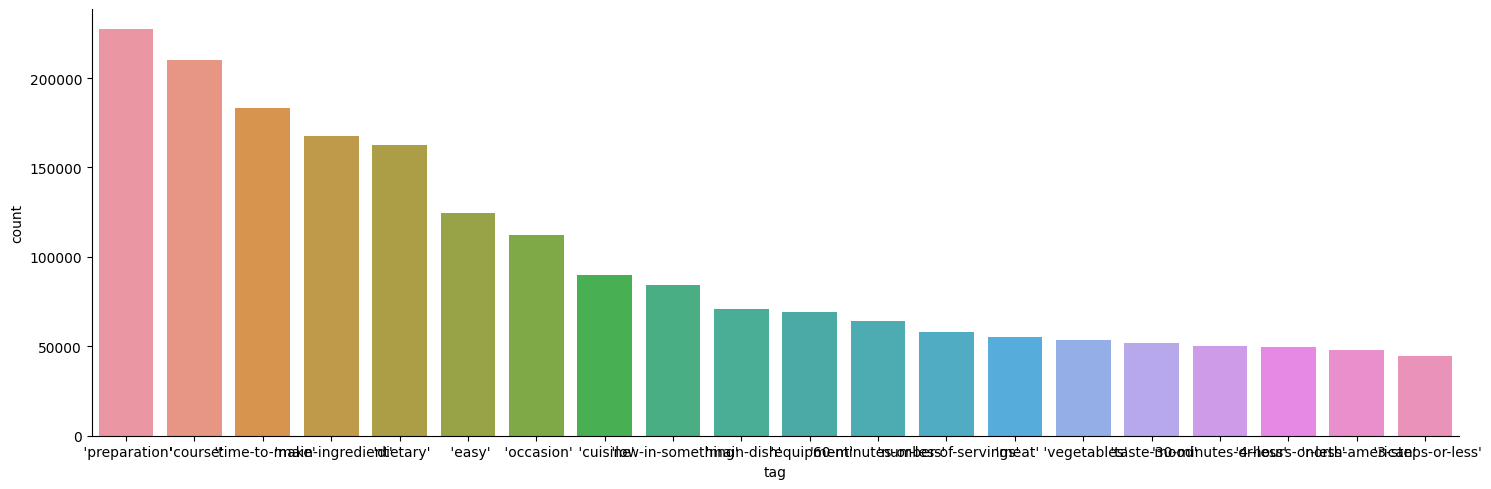

In [38]:
sns.catplot(data=tag_count.sort_values(by='count', ascending=False).head(20), x='tag', y='count', kind='bar', height=5, aspect=3)

Almost all recipes have 'preparation' as tag and it don't give us but we can take a look on tags as : dietary (71.15%), easy (54.61%), meat (24.17%), vegetables (23.33%), north-american (20.91%)

So the majority of recipe are supposed to have a good nutrition score (calories) and are easy to make. We can also notice that 20% of recipes come from North America (USA, Canada, Mexico) which possibly the origin of a big part of contributor.

In [39]:
tag_count.sort_values(by='count', ascending=True).head(20)

,tag,count,percentage
571,'roast-beef-comfort-food',1,0.0
544,'dips-summer',1,0.0
543,'high-in-something-diabetic-friendly',1,0.0
510,'heirloom-historical-recipes',1,0.0
404,'eggs-breakfast',1,0.0
540,'cabbage',1,0.0
570,'roast-beef-main-dish',1,0.0
538,'lasagne',1,0.0
536,'desserts-easy',1,0.0
535,'desserts-fruit',1,0.0


When we look the less use tags, we can notice that its compound words that give more than one informations (e.g : "dessert-easy", here we can say the recipe is for a dessert and it easy to make which correspond to 2 tags) but split on '-' could be an issue in case of "irish-st-patricks-day" which make us know that is a dish for Saint Patrick from Ireland and if we split it we will no longer have than same informations. 

#### n-steps Analysis

**Questions :**
- <span style="color:blue"> What is the average of step to make a recipe ?</span>
- <span style="color:blue"> What is the longest and the short recipe ? How many step in each case ?</span>

In [40]:
# Average steps 
avg_steps = round(recipe_clear_2['n_steps'].mean())
print("Average time for recipes: ", avg_steps)

Average time for recipes:  10


In [41]:
print('Maximum cooking step', recipe_clear_2['n_steps'].max())
print('Minimum cooking step', recipe_clear_2['n_steps'].min())

Maximum cooking step 145
Minimum cooking step 0


In [42]:
recipe_clear_2.loc[recipe_clear_2['n_steps'] == recipe_clear_2['n_steps'].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
78633,easy yeast bread with variations,158120,210,182358,2006-02-28,"['time-to-make', 'course', 'preparation', 'hea...","[1784.5, 62.0, 104.0, 151.0, 103.0, 42.0, 99.0]",145,"['white bread:', 'lightly spooning flour into ...",found online in response to a request and now ...,"[all-purpose flour, dry yeast, sugar, salt, wa...",8


In [43]:
recipe_clear_2.loc[recipe_clear_2['n_steps'] == recipe_clear_2['n_steps'].max()]['steps'].values[0]

"['white bread:', 'lightly spooning flour into measuring cup & leveling off , measure out 2 1 / 2 cups flour', 'combine flour , dry yeast , sugar , & salt in a large mixer bowl', 'blend', 'in a medium saucepan , combine water , milk , and oil', 'heat until very warm', 'add eggs and liquid to flour mixture', 'mixing - blend at low speed until moistened', 'beat 3 minutes at medium speed', 'with a wooden spoon , stir in an additional 3 to 3-1 / 2 cups of flour to form a sticky dough', 'in bowl or on a floured board , gradually work in 1 / 2 to 1-1 / 2 cups more flour , kneading or working in with hands until dough is smooth , pliable and no longer sticky', 'rising - place dough in a greased bowl', 'cover with a cloth or loose fit lid', 'let rise in a warm place until light and double in size , about 45 minutes', 'shaping & baking:punch down dough to remove air bubbles', 'divide dough into two parts', 'from dough into desired shapes', 'place in greased pans according to shaping and baking 

In [44]:
recipe_clear_2.loc[recipe_clear_2['n_steps'] == recipe_clear_2['n_steps'].min()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
3381,all season bread,176767,90,331268,2006-07-10,"['time-to-make', 'course', 'main-ingredient', ...","[198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]",0,[],just change the fruit/vegetable in this recipe...,"[flour, baking soda, salt, baking powder, cinn...",12


It's not possible to have a recipe with no step, therefore we have 2 solutions  that can be applied. The first one is to imput a value (look to similar recipe base on the number of ingredients, the time, the nutrition), the second approach is to drop the row since it can create biais.

In the next steps, we will use the second solutions and drop the row.

For the recipe with 145, in the step we have many variance propose for the same recipe (we have many recipe join in one). As for the O step, the row with 145 step will be dropped

In [45]:
recipe_clear_3 = recipe_clear_2.loc[(recipe_clear_2['n_steps'] != recipe_clear_2['n_steps'].min()) & (recipe_clear_2['n_steps'] != recipe_clear_2['n_steps'].max())]


In [46]:
print('New maximum cooking step', recipe_clear_3['n_steps'].max())
print('New minimum cooking step', recipe_clear_3['n_steps'].min())

New maximum cooking step 113
New minimum cooking step 1


In [47]:
recipe_clear_3.loc[recipe_clear_3['n_steps'] == recipe_clear_3['n_steps'].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...","[cake flour, baking soda, salt, godiva dark ch...",24


In [48]:
recipe_clear_3.loc[recipe_clear_3['n_steps'] == recipe_clear_3['n_steps'].max()]['steps'].values[0]

'[\'make the chocolate sour cream cake:\', \'preheat oven to 350f\', \'lightly butter the bottom and sides of two 9x2" round cake pans\', \'line the bottoms of the pans with parchment paper\', \'dust the sides of the pans with flour and tap out the excess\', \'sift together flour , baking soda and salt onto a piece of waxed paper\', \'place chocolate in microwave-safe bowl\', \'microwave on medium1 minute\', \'stir\', \'microwave 1 minute more or until chocolate softens\', \'stir until smooth\', \'let cool\', \'beat butter and shortening in mixing bowl until creamy , using electric mixer at medium speed\', \'add brown sugar\', \'continuing to beat , gradually add granulated sugar over a 4 minute period\', \'continue beating for another 1-2 minutes or until mixture is a light texture and off-white in color\', \'beat in vanilla\', \'beat eggs with fork until frothy\', \'at medium speed while continuing to beat , slowly add beaten eggs to batter\', \'add sour cream aand beat until smooth\

Despite we have 113 steps, after looking the different steps we can see that it still the same recipe contrary to the previous recipe we drop which was many variance in one recipe.

<Axes: ylabel='n_steps'>

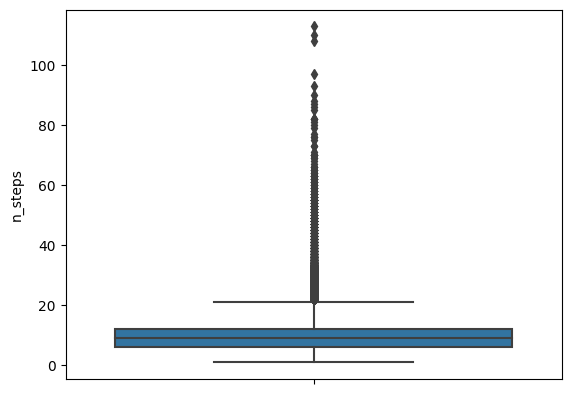

In [49]:
sns.boxplot(data=recipe_clear_3, y='n_steps')

#### n-ingredients Analysis

**Questions :**
- <span style="color:blue"> What is the average of ingredients use to make a recipe ?</span>
- <span style="color:blue"> Which recipe use the most and the less ingredients ? How many ingredients in each case ?</span>

In [50]:
# Average steps 
avg_ingredient = round(recipe_clear_3['n_ingredients'].mean())
print("Average ingredients for recipes: ", avg_ingredient)

Average ingredients for recipes:  9


In [51]:
print('Maximum ingredients', recipe_clear_3['n_ingredients'].max())
print('Minimum ingredients', recipe_clear_3['n_ingredients'].min())

Maximum ingredients 43
Minimum ingredients 1


In [52]:
recipe_clear_3.loc[recipe_clear_3['n_ingredients'] == recipe_clear_3['n_ingredients'].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
2162,a to z bread,3748,80,1535,1999-10-30,"['time-to-make', 'course', 'main-ingredient', ...","[367.0, 30.0, 101.0, 10.0, 9.0, 12.0, 14.0]",12,"['in a mixing bowl , combine the sugar , oil a...",an extremely versatile bread. very moist and d...,"[sugar, vegetable oil, eggs, vanilla extract, ...",43


In [53]:
len(recipe_clear_3.loc[recipe_clear_3['n_ingredients'] == recipe_clear_3['n_ingredients'].min()])

25

The recipe having the most ingredient is "a to z bread" with 43 ingredients  and we have 25 recipes with 1 ingredients

<Axes: ylabel='n_ingredients'>

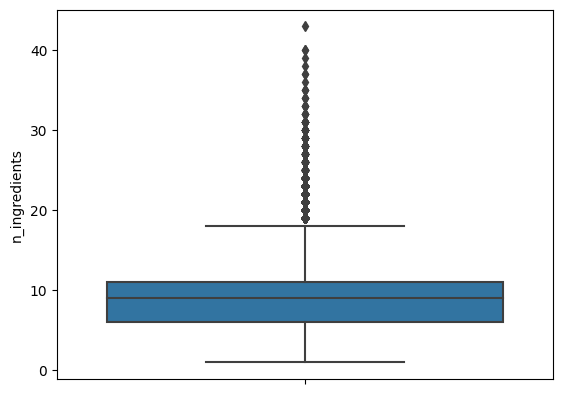

In [54]:
sns.boxplot(data=recipe_clear_3, y='n_ingredients')

#### ingredients Analysis

**Questions :**
- <span style="color:blue"> Top 15 of ingredients use for recipe</span>
- <span style="color:blue"> The ingredients the less use</span>

In [55]:
recipes_ingredients = recipe_clear_3["ingredients"]
recipes_ingredients.head()

0    [winter squash, mexican seasoning, mixed spice...
1    [prepared pizza crust, sausage patty, eggs, mi...
2    [ground beef, yellow onions, diced tomatoes, t...
3    [spreadable cheese with garlic and herbs, new ...
4    [tomato juice, apple cider vinegar, sugar, sal...
Name: ingredients, dtype: object

In [56]:
unique_ingredients, ingredients = unique_ingredient(recipe_clear_3)

The number of different ingredients: 14796


In [57]:
ingredients

['winter squash',
 'mexican seasoning',
 'mixed spice',
 'honey',
 'butter',
 'olive oil',
 'salt',
 'prepared pizza crust',
 'sausage patty',
 'eggs',
 'milk',
 'salt and pepper',
 'cheese',
 'ground beef',
 'yellow onions',
 'diced tomatoes',
 'tomato paste',
 'tomato soup',
 'rotel tomatoes',
 'kidney beans',
 'water',
 'chili powder',
 'ground cumin',
 'salt',
 'lettuce',
 'cheddar cheese',
 'spreadable cheese with garlic and herbs',
 'new potatoes',
 'shallots',
 'parsley',
 'tarragon',
 'olive oil',
 'red wine vinegar',
 'salt',
 'pepper',
 'red bell pepper',
 'yellow bell pepper',
 'tomato juice',
 'apple cider vinegar',
 'sugar',
 'salt',
 'pepper',
 'clove oil',
 'cinnamon oil',
 'dry mustard',
 'fennel seeds',
 'green olives',
 'ripe olives',
 'garlic',
 'peppercorn',
 'orange rind',
 'orange juice',
 'red chile',
 'extra virgin olive oil',
 'pork spareribs',
 'soy sauce',
 'fresh garlic',
 'fresh ginger',
 'chili powder',
 'fresh coarse ground black pepper',
 'salt',
 'fresh

In [58]:
# Display the 15 most used tags
ingredient_count = ingredient_frequency(recipe_clear_3, ingredients)
print("The 15 most used ingredients are:")
ingredient_count.head(15)

The 15 most used ingredients are:


,ingredient,count,percentage
6,salt,84595,37.03
4,butter,54465,23.84
36,sugar,43671,19.12
101,onion,38632,16.91
20,water,34226,14.98
9,eggs,33395,14.62
5,olive oil,32485,14.22
90,flour,25984,11.38
10,milk,25529,11.18
470,garlic cloves,25469,11.15


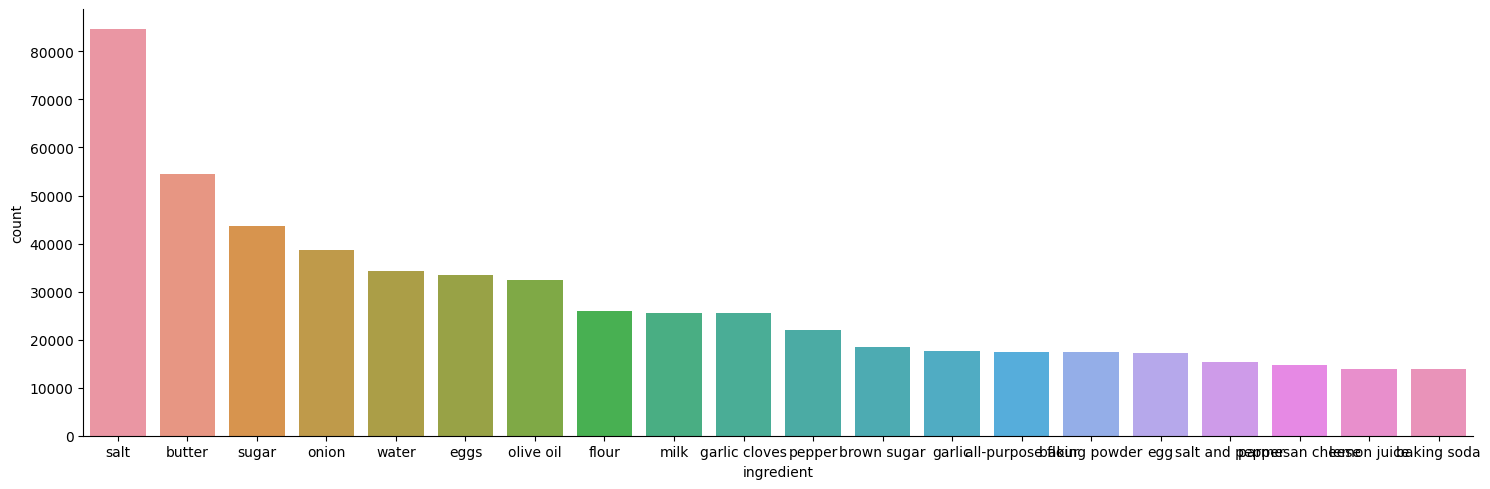

In [59]:
sns.catplot(data=ingredient_count.sort_values(by='count', ascending=False).head(20), x='ingredient', y='count', kind='bar', height=5, aspect=3)

We can see that sugar is not the second most use ingredient because it existe different type of sugar (sugar(#3), brown sugar(#12))

In [60]:
print("The 15 less used ingredients are:")
ingredient_count.sort_values(by='count', ascending=True).head(15)

The 15 less used ingredients are:


,ingredient,count,percentage
14795,nepitella,1,0.0
14386,paper drink umbrellas,1,0.0
14387,five grain tempeh,1,0.0
14388,vegan monterey jack cheese,1,0.0
13496,primavera pasta sauce,1,0.0
13494,poi,1,0.0
1837,low-carb marinara sauce,1,0.0
14389,frozen tempura shrimp,1,0.0
13492,bronzino,1,0.0
13491,sate seasoning,1,0.0


In [61]:
print("The number of ingredients use just one time is", len(ingredient_count.loc[ingredient_count['count'] == 1]), "over", len(ingredient_count))

The number of ingredients use just one time is 3501 over 14796


##### Comment : 

For the projet in the second part, we will drop row where we have ingredients use less than 5 times to reduce the number of columns

In [62]:
recipe_clear_3.shape

(228420, 12)

In [63]:
# Drop row where less used ingredient are used

less_used_ingredient = ingredient_count.loc[ingredient_count['count'] <= 10]
less_used_ingredient = list(less_used_ingredient['ingredient'])

recipe_clear_3 = recipe_clear_3[~recipe_clear_3['ingredients'].apply(lambda x: any(i in less_used_ingredient for i in x))] # GitHub Copilot code
    
recipe_clear_3.shape

(202977, 12)

In [64]:
unique_ingredients, ingredients = unique_ingredient(recipe_clear_3)

The number of different ingredients: 5679


### Bivariate Analysis

In [65]:
recipe_clear_3.dtypes

name                object
id                  object
minutes              int64
contributor_id    category
submitted           object
tags                object
nutrition           object
n_steps              int64
steps               object
description         object
ingredients         object
n_ingredients        int64
dtype: object

Now we will study the relation between features.

Some of the relations on which we can have a look are :

- (**minutes**, **n_steps**)
- (**minutes**, **n_ingredients**)
- (**n_steps**, **n_ingredients**)

#### (minutes, n_steps)

<Axes: xlabel='minutes', ylabel='n_steps'>

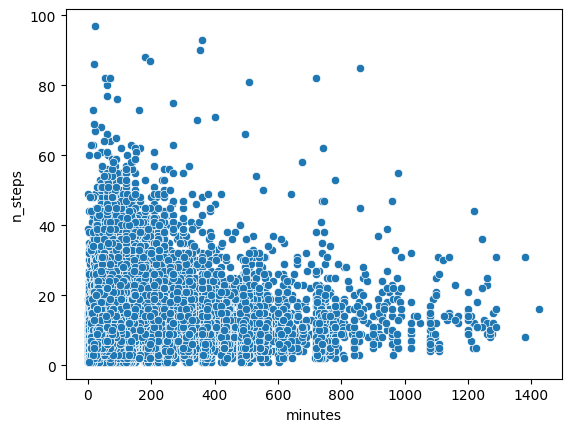

In [66]:
# Scatter plot minutes and n_steps

sns.scatterplot(data=recipe_clear_3, x='minutes', y='n_steps')

<Axes: xlabel='minutes', ylabel='n_ingredients'>

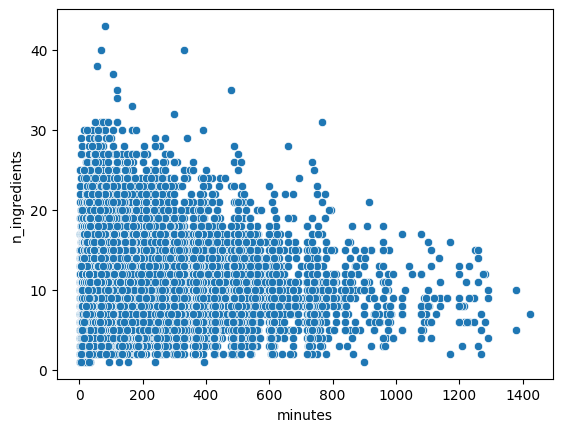

In [67]:
# Scatter plot minutes and n_steps

sns.scatterplot(data=recipe_clear_3, x='minutes', y='n_ingredients')

<Axes: xlabel='n_steps', ylabel='n_ingredients'>

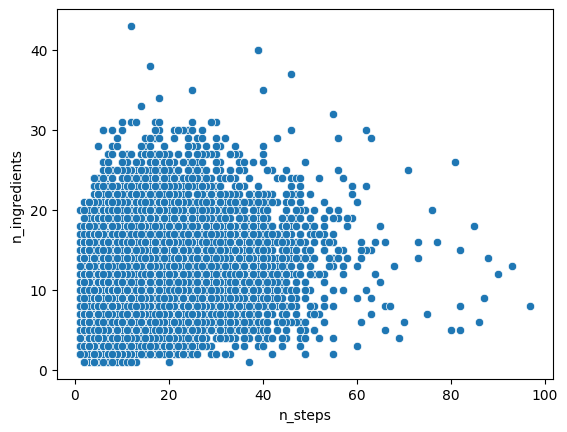

In [68]:
# Scatter plot minutes and n_steps

sns.scatterplot(data=recipe_clear_3, x='n_steps', y='n_ingredients')

<Axes: >

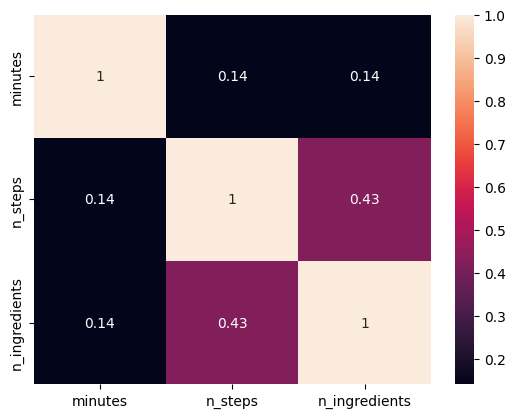

In [69]:
# Matrice de corrélation

sns.heatmap(recipe_clear_3[['minutes', 'n_steps', 'n_ingredients']].corr(), annot=True)

<Axes: >

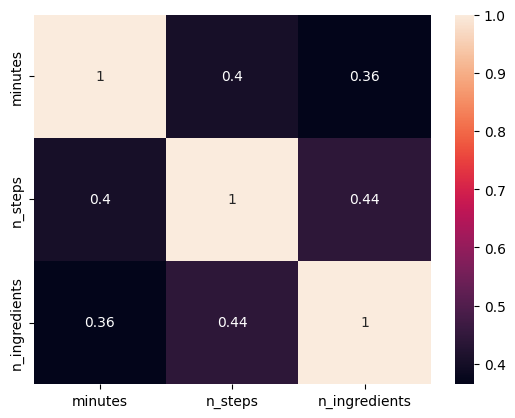

In [70]:
# Matrice de corrélation

sns.heatmap(recipe_clear_3[['minutes', 'n_steps', 'n_ingredients']].corr(method = 'spearman'), annot=True)

On peut constaté qu'il n'existe pas de corrélation (linéaire ou pas entre minutes, n_steps et n_ingredients)

### Projet

Pour le projet, on a étudié la nutrition plus précisement les calories des recettes. Ainsi à partir des éléments comme les ingrédients et le type de préparation et autre, prédire l'apport calorique d'un plat

#### Nutrition

##### Déterminer le score de nutrition d'un recipe

On va se baser sur les informations suivantes :
- ingredients
- minutes : temps de préparation
- nutrition (*varaibles cibles ?*) : [calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV)]
- technique : la technique de préparation utilisée (bouillir, frire, griller...)
- n_ingredients? : nombre d'ingrédients?
- n_steps? : nombre d'étapes?
- ...

Ainsi pour une nouvelle recette, on pourra attriduer un score de nutrition

OU

Faire un clustering des recettes en se basant sur la nutrition (ressortir si possible des recettes qui sont sain ou pas)


##### Ajout de colonne dans la dataframe recette

Ici, on va scindé la colonne nutrition est 7 ('calories','total_fat_pdv','sugar_pdv','sodium_pdv','protein_pdv','saturated_fat','carbohydrates_pdv').

Dans un second temps, on a ajouté une colonne pour chaque ingrédient (14760) et dire s'il est présent dans la recette (1) ou pas (0)
Pour finir on va refaire l'opératon du cas précédent mais en utilisant les techniques de préparation (58 techniques) que nous allons récuper dans le jeu de données PP_recipess.

TECHNIQUES_LIST = [
    'bake',
    'barbecue',
    'blanch',
    'blend',
    'boil',
    'braise',
    'brine',
    'broil',
    'caramelize',
    'combine',
    'crock pot',
    'crush',
    'deglaze',
    'devein',
    'dice',
    'distill',
    'drain',
    'emulsify',
    'ferment',
    'freez',
    'fry',
    'grate',
    'griddle',
    'grill',
    'knead',
    'leaven',
    'marinate',
    'mash',
    'melt',
    'microwave',
    'parboil',
    'pickle',
    'poach',
    'pour',
    'pressure cook',
    'puree',
    'refrigerat',
    'roast',
    'saute',
    'scald',
    'scramble',
    'shred',
    'simmer',
    'skillet',
    'slow cook',
    'smoke',
    'smooth',
    'soak',
    'sous-vide',
    'steam',
    'stew',
    'strain',
    'tenderize',
    'thicken',
    'toast',
    'toss',
    'whip',
    'whisk',
]

##### Ajout des colonnes decrivant la nutrition

In [71]:
NUTRITION = ['calories','total_fat_pdv','sugar_pdv','sodium_pdv','protein_pdv','saturated_fat','carbohydrates_pdv']

In [72]:
# Split the 'nutrition' column into multiple columns
recipe_nutrition = recipe_clear_3.copy()
recipe_nutrition[NUTRITION] = recipe_nutrition['nutrition'].tolist()

# Convert the data type to float
recipe_nutrition[NUTRITION] = recipe_nutrition[NUTRITION].astype('float')

recipe_nutrition

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat,carbohydrates_pdv
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"[fennel seeds, green olives, ripe olives, garl...",9,380.7,53.0,7.0,24.0,6.0,24.0,6.0
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"[pork spareribs, soy sauce, fresh garlic, fres...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231631,zydeco shrimp wrap,188810,57,37779,2006-10-03,"['60-minutes-or-less', 'time-to-make', 'course...","[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]",14,"['bring 3 quarts salted to water to a boil', '...",a wrap inspired by great cajun flavors,"[white rice, vegetable oil, onion, green bell ...",11,482.6,13.0,25.0,37.0,33.0,9.0,27.0
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","[butter, eagle brand condensed milk, light bro...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0


##### Ajout des ingrédients

In [73]:
# List of ingredients
unique_ingredients

['ranch dip',
 'shallot',
 'sour milk',
 'yellow wax beans',
 'colored sugar sprinkle',
 'sambal oelek',
 'chili',
 'coconut flour',
 'frozen pineapple concentrate',
 'ground mixed spice',
 'baguette',
 'dried great northern beans',
 'sazon goya seasoning',
 'fingerling potato',
 'oregano',
 'ghee',
 'strawberry jell-o gelatin dessert',
 'ground sausage',
 'spicy mustard',
 'dry fettuccine',
 'avocado oil',
 'beef bouillon granules',
 'whole wheat breadcrumbs',
 'courgette',
 'fresh herb',
 'grenadine',
 'virgin olive oil',
 'cremini mushrooms',
 'dream whip',
 'radish sprouts',
 'herbs',
 'dark cooking chocolate',
 'nutmeg',
 'chicken legs with thigh',
 'cayenne powder',
 'shrimp stock',
 'large raw shrimp',
 'vitamin c powder',
 'tart apple',
 'tapenade',
 'dried new mexico chiles',
 'green onions with top',
 'nonfat cottage cheese',
 'sardines',
 'grand marnier',
 'vanilla cake mix',
 'graham cracker crumb crust',
 'unblanched whole almonds',
 'red chili peppers',
 'pillsbury refrig

In [74]:
# With the help of Chat GPT
#recipe_nutrition['ingredients'] = recipe_nutrition['ingredients'].apply(lambda x : ast.literal_eval(x))
recipe_ingredients = recipe_nutrition.explode('ingredients')
recipe_ingredients = pd.get_dummies(recipe_ingredients['ingredients'], dtype='int8')
recipe_ingredients = recipe_ingredients.groupby(by=recipe_ingredients.index).agg(['sum'])
recipe_ingredients

,1% fat buttermilk,1% fat cottage cheese,1% low-fat milk,10% cream,10-inch flour tortillas,15% cream,18% table cream,2% cheddar cheese,2% evaporated milk,2% fat cottage cheese,...,yogurt cheese,your favorite barbecue rub,yucca root,yukon gold potato,yukon gold potatoes,za'atar spice mix,zinfandel,ziploc bag,ziti pasta,zucchini
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
recipe_nutrition = pd.concat([recipe_nutrition, recipe_ingredients], axis=1)

In [76]:
recipe_nutrition

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,"(yogurt cheese, sum)","(your favorite barbecue rub, sum)","(yucca root, sum)","(yukon gold potato, sum)","(yukon gold potatoes, sum)","(za'atar spice mix, sum)","(zinfandel, sum)","(ziploc bag, sum)","(ziti pasta, sum)","(zucchini, sum)"
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0,0,0,0,0,0,0,0,0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,0,0,0,0,0,0,0,0,0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,0,0,0,0,0,0,0,0,0,0
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,...,0,0,0,0,0,0,0,0,0,0
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231631,zydeco shrimp wrap,188810,57,37779,2006-10-03,"['60-minutes-or-less', 'time-to-make', 'course...","[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]",14,"['bring 3 quarts salted to water to a boil', '...",a wrap inspired by great cajun flavors,...,0,0,0,0,0,0,0,0,0,0
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,...,0,0,0,0,0,0,0,0,0,0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,...,0,0,0,0,0,0,0,0,0,0
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...",...,0,0,0,0,0,0,0,0,0,0


In [77]:
recipe_nutrition.shape

(202977, 5698)

##### Technique de preparation

Importation de jeu de données PP_recipes

In [78]:
# list of techniques

TECHNIQUES_LIST = [
    'bake',
    'barbecue',
    'blanch',
    'blend',
    'boil',
    'braise',
    'brine',
    'broil',
    'caramelize',
    'combine',
    'crock pot',
    'crush',
    'deglaze',
    'devein',
    'dice',
    'distill',
    'drain',
    'emulsify',
    'ferment',
    'freez',
    'fry',
    'grate',
    'griddle',
    'grill',
    'knead',
    'leaven',
    'marinate',
    'mash',
    'melt',
    'microwave',
    'parboil',
    'pickle',
    'poach',
    'pour',
    'pressure cook',
    'puree',
    'refrigerat',
    'roast',
    'saute',
    'scald',
    'scramble',
    'shred',
    'simmer',
    'skillet',
    'slow cook',
    'smoke',
    'smooth',
    'soak',
    'sous-vide',
    'steam',
    'stew',
    'strain',
    'tenderize',
    'thicken',
    'toast',
    'toss',
    'whip',
    'whisk',
]

In [79]:
pp_recipes = pd.read_csv("recipe/PP_recipes.csv")
pp_recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [80]:
# Code pris chez Matthias 
# Split the 'nutrition' column into multiple columns
pp_recipes['techniques'] = pp_recipes['techniques'].apply(ast.literal_eval)
pp_recipes[TECHNIQUES_LIST] = pp_recipes['techniques'].tolist()

# Convert the data type to float
pp_recipes[TECHNIQUES_LIST] = pp_recipes[TECHNIQUES_LIST].astype('int8')

pp_recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,bake,barbecue,...,sous-vide,steam,stew,strain,tenderize,thicken,toast,toss,whip,whisk
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",0,0,...,0,0,0,1,0,0,0,0,0,0
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",1,0,...,0,0,0,0,0,0,0,0,1,1
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",0,0,...,0,0,0,0,0,0,0,0,0,0
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1,0,...,0,0,0,0,0,0,0,0,0,0
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]",0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]",1,0,...,0,0,0,0,0,0,0,0,0,0
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]",1,0,...,0,0,0,0,0,0,0,0,0,0
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1,0,...,0,0,0,0,0,0,0,0,0,0
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
# Add a column with the number of techniques used

pp_recipes['nb_techniques'] = pp_recipes[TECHNIQUES_LIST].sum(axis=1)

pp_recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,bake,barbecue,...,steam,stew,strain,tenderize,thicken,toast,toss,whip,whisk,nb_techniques
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",0,0,...,0,0,1,0,0,0,0,0,0,3
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",1,0,...,0,0,0,0,0,0,0,1,1,8
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",0,0,...,0,0,0,0,0,0,0,0,0,5
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1,0,...,0,0,0,0,0,0,0,0,0,3
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]",0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]",1,0,...,0,0,0,0,0,0,0,0,0,2
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]",1,0,...,0,0,0,0,0,0,0,0,0,2
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1,0,...,0,0,0,0,0,0,0,0,0,4
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",0,0,...,0,0,0,0,1,0,0,0,0,7


In [82]:
# Average number of techniques used

avg_techniques = round(pp_recipes['nb_techniques'].mean())
print("The average of techniques used is", avg_techniques)

The average of techniques used is 3


In [83]:
# Maximum and minimum number of techniques used

print('Maximum number of techniques used', pp_recipes['nb_techniques'].max())
print('Minimum number of techniques used', pp_recipes['nb_techniques'].min())

Maximum number of techniques used 14
Minimum number of techniques used 0


In [84]:
# Add techniques to recipe_nutrition

merge_recipe = pd.merge(recipe_nutrition[['id','minutes', 'n_steps', 'n_ingredients']+list(recipe_ingredients.columns)+NUTRITION], pp_recipes[['id', 'calorie_level']+TECHNIQUES_LIST], on='id')

merge_recipe

,id,minutes,n_steps,n_ingredients,"(1% fat buttermilk, sum)","(1% fat cottage cheese, sum)","(1% low-fat milk, sum)","(10% cream, sum)","(10-inch flour tortillas, sum)","(15% cream, sum)",...,sous-vide,steam,stew,strain,tenderize,thicken,toast,toss,whip,whisk
0,137739,55,11,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,59389,45,11,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25274,15,4,9,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,70971,180,8,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,75452,70,12,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157819,455209,10,5,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157820,61748,35,10,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157821,185979,20,6,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157822,357451,15,3,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
merge_recipe.dtypes

id                          object
minutes                      int64
n_steps                      int64
n_ingredients                int64
(1% fat buttermilk, sum)      int8
                             ...  
thicken                       int8
toast                         int8
toss                          int8
whip                          int8
whisk                         int8
Length: 5749, dtype: object

##### Normaliser les données non binaires

Afin de ne pas donner plus d'importance à certaines variables par rapport à d'autres

In [86]:
# Normalisation

from sklearn.preprocessing import Normalizer

norm = Normalizer()
norm.fit(merge_recipe[['minutes', 'n_steps', 'n_ingredients'] + NUTRITION])

merge_recipe[['minutes', 'n_steps', 'n_ingredients'] + NUTRITION] = norm.transform(merge_recipe[['minutes', 'n_steps', 'n_ingredients'] + NUTRITION])

##### Split data in train set and test set

In [89]:
# Split the data into train and test

from sklearn.model_selection import train_test_split

X = merge_recipe.drop(columns=['id', 'calorie_level', 'n_ingredients']+NUTRITION)
y = merge_recipe['calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### ML model

In [90]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Convert all feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [103]:
# Apply Random Forest
# I choose 60 as max_features because it's the number of features we have in maximum 43 ingredients + 14 techniques + 1 minutes + 1 n_steps + 1 n_ingredients
rf = RandomForestRegressor(n_estimators=1000, random_state=42, max_features=60)
rf.fit(X_train, y_train)



RandomForestRegressor(max_features=60, n_estimators=1000, random_state=42)

In [104]:
# Predict the calories

y_train_pred = rf.predict(X_train)

In [105]:
# Calculate the score

print("The score of the model is", rf.score(X_train, y_train))

The score of the model is 0.9623363764325978


In [106]:
# Predict the calories

y_test_pred = rf.predict(X_test)

In [107]:
# Calculate the score

print("The score of the model is", rf.score(X_test, y_test))

The score of the model is 0.7231614592928617


In [108]:
# Calculate the mean squared error

print("The mean squared error is", mean_squared_error(y_test, y_test_pred))

The mean squared error is 0.004150039015998638


On peut voir que le model ce comportement bien sur les données d'entrainement mais sur le test c'est moins efficace. Une solution possible est d'augmenter le nombre de feature max mais avec le risque d'augmenter le temps de calcul et avec un jeu de données donnant les quantités de chaque ingrédients ainsi au lieu de dire 1 si un ingredient est présent, on peut donner la quantité ainsi on aura une meilleure idée de l'apport calorique de chaque ingredient. Sur le site de Food.com, il est possible de connaitre ces quantités mais cette information n'est pas disponible sur le jeu de donnée.

<img src="img/ingredient_quantity.png" alt="Food.com recipe ingredient quantity" width="500"/>

Il est aussi possible de contaster que sur Food.com, les informations sur la nutrition sont données pour un certain grammage, cette information pourra utile pour une meilleure precision car pour un même plat l'apport calorie change en fonction de la quantité qui est consommée.

<img src="img/nutrition.png" alt="Food.com recipe nutrition" width="750" />